## Imports

In [1]:
from scipy.misc import imread
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from dataget import data # <== dataget
import tfinterface as ti

%matplotlib inline

## Obtener Dataset
Utilizando la funcion `data` de `dataget` llamamos el dataset `german-traffic-signs` y ejecutamos el metodo `get` por si acaso aun no tenemos los datos. Podriamos excluir el llamado a `.get()` si ya descargamos los datos desde la consola, sin embargo, `get` no descargara los datos si ya existen por lo tanto no hace daño tenerlo.

In [2]:
dataset = data("german-traffic-signs").get()

===DOWNLOAD===
downloading test-set.csv.zip
downloading training-set.zip
downloading test-set.zip
training-set.zip 0%
test-set.zip 0%
test-set.csv.zip 0%
test-set.csv.zip 65%
test-set.csv.zip 90%
test-set.zip 5%
training-set.zip 5%
training-set.zip 10%
test-set.zip 10%
training-set.zip 15%
test-set.zip 15%
training-set.zip 20%
test-set.zip 20%
training-set.zip 25%
training-set.zip 30%
test-set.zip 25%
test-set.zip 30%
test-set.zip 35%
training-set.zip 35%
test-set.zip 40%
test-set.zip 45%
test-set.zip 50%
training-set.zip 40%
test-set.zip 55%
test-set.zip 60%
test-set.zip 65%
test-set.zip 70%
training-set.zip 45%
test-set.zip 75%
test-set.zip 80%
training-set.zip 50%
test-set.zip 85%
training-set.zip 55%
training-set.zip 60%
test-set.zip 90%
test-set.zip 95%
training-set.zip 65%
test-set.zip 100%
training-set.zip 70%
training-set.zip 75%
training-set.zip 80%
training-set.zip 85%
training-set.zip 90%
training-set.zip 95%
training-set.zip 100%

===EXTRACT===
extracting training-set.zip
e

formatting /data/cristian/supervised-avanzado-german-traffic-signs/.dataget/data/german-traffic-signs/training-set/13/13.csv
13
formating training-set 14
formatting /data/cristian/supervised-avanzado-german-traffic-signs/.dataget/data/german-traffic-signs/training-set/14/14.csv
14
formating training-set 15
formatting /data/cristian/supervised-avanzado-german-traffic-signs/.dataget/data/german-traffic-signs/training-set/15/15.csv
15
formating training-set 16
formatting /data/cristian/supervised-avanzado-german-traffic-signs/.dataget/data/german-traffic-signs/training-set/16/16.csv
16
formating training-set 17
formatting /data/cristian/supervised-avanzado-german-traffic-signs/.dataget/data/german-traffic-signs/training-set/17/17.csv
17
formating training-set 18
formatting /data/cristian/supervised-avanzado-german-traffic-signs/.dataget/data/german-traffic-signs/training-set/18/18.csv
18
formating training-set 19
formatting /data/cristian/supervised-avanzado-german-traffic-signs/.dataget/

### Random Batch DataFrame
Para fines de visualizacion, a continuacion vamos a obtener un dataframe de 10 filas con imagenes aleatorias del `training_set` utilizando el metodo `random_batch_dataframe_generator`, este nos devuelve un generador "infinito" por lo cual utilizamos la funcion `next` para obtener solo el primer dataframe.

In [3]:
# obtener todas la imagenes (lento)
# df = dataset.training_set.dataframe()

# obtener 10 imagenes aleatorias (rapido)
df = next(dataset.training_set.random_batch_dataframe_generator(10))


df

,filename,width,height,roi.x1,roi.y1,roi.x2,roi.y2,class_id,image
1281,/data/cristian/supervised-avanzado-german-traf...,68,69,6,7,62,63,9,"[[[255, 255, 255], [255, 254, 255], [255, 254,..."
434,/data/cristian/supervised-avanzado-german-traf...,64,58,6,5,59,52,13,"[[[243, 255, 255], [232, 248, 248], [232, 251,..."
547,/data/cristian/supervised-avanzado-german-traf...,52,51,5,6,47,46,18,"[[[68, 68, 60], [74, 70, 58], [61, 55, 41], [4..."
26,/data/cristian/supervised-avanzado-german-traf...,134,122,12,11,123,111,27,"[[[51, 50, 48], [41, 40, 36], [40, 39, 35], [4..."
83,/data/cristian/supervised-avanzado-german-traf...,43,41,5,6,38,36,10,"[[[65, 71, 71], [64, 70, 68], [65, 71, 69], [6..."
1769,/data/cristian/supervised-avanzado-german-traf...,71,70,7,6,65,64,38,"[[[87, 77, 76], [81, 72, 73], [80, 74, 78], [8..."
1024,/data/cristian/supervised-avanzado-german-traf...,35,33,5,6,30,28,18,"[[[15, 13, 18], [15, 14, 20], [15, 15, 23], [1..."
227,/data/cristian/supervised-avanzado-german-traf...,62,57,6,5,57,52,30,"[[[83, 114, 161], [19, 35, 68], [25, 28, 43], ..."
357,/data/cristian/supervised-avanzado-german-traf...,63,67,5,6,58,61,6,"[[[255, 255, 253], [255, 255, 253], [255, 255,..."
684,/data/cristian/supervised-avanzado-german-traf...,43,44,5,6,38,39,4,"[[[74, 88, 97], [82, 89, 99], [95, 98, 107], [..."


Como vemos, el dataframe tiene los atributos `filename` que nos indica el nombre del archivo, `class_id` es la clase a la que corresponde la imagen, e `images` el cual contiene la informacion de la imagen representada como arreglos de numpy. Los otros atributos nos dicen la informacion del bounding box pero estos nos son relevantes para la tarea que queremos realizar.

### Visualizacion de las muestras
Para visualizar las muestras iteramos sobre el dataframe y utilizamos la funcion `imshow` de `matplotlib.pyplot` el cual importamos como `plt`.

class: 9, shape: (32, 32, 3)


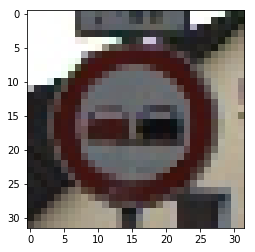

class: 13, shape: (32, 32, 3)


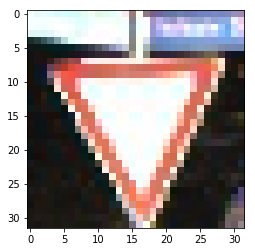

class: 18, shape: (32, 32, 3)


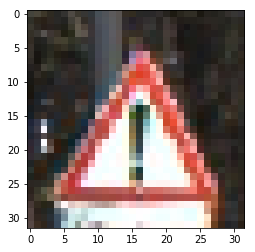

class: 27, shape: (32, 32, 3)


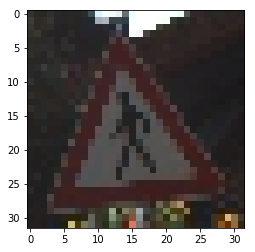

class: 10, shape: (32, 32, 3)


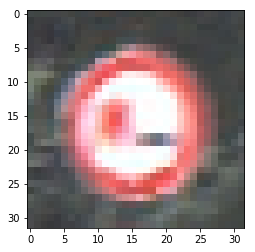

class: 38, shape: (32, 32, 3)


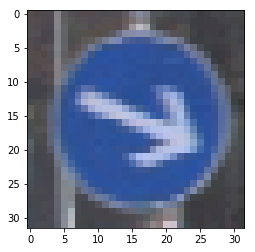

class: 18, shape: (32, 32, 3)


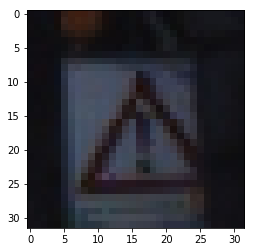

class: 30, shape: (32, 32, 3)


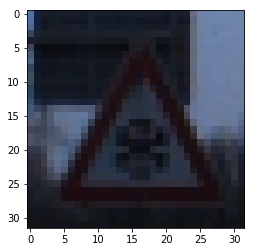

class: 6, shape: (32, 32, 3)


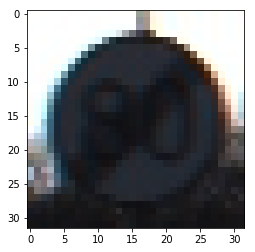

class: 4, shape: (32, 32, 3)


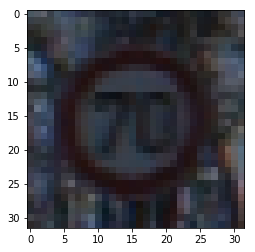

In [4]:
for i, row in df.iterrows():
    img = row.image
    print("class: {}, shape: {}".format(row.class_id, img.shape))
    plt.imshow(img)
    plt.show()

### Numpy Arrays
Para trabajar

In [6]:
# obtener todas las imagenes (lento)
# features, labels = dataset.training_set.arrays()

# obtener 10 imagenes alatorias (rapido)
features, labels = next(dataset.training_set.random_batch_arrays_generator(10))

print("Features shape: {} \nLabels shape: {}".format(features.shape, labels.shape))

Features shape: (10, 32, 32, 3) 
Labels shape: (10,)
